<a href="https://colab.research.google.com/github/RiaTopre/Cureya-Internship/blob/main/Cureya_Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Cureya Internship Week 4**

> ### Task Name: Titanic Survival Project
> #### ***Work by: Ria Topre***

####**Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Loading the Dataset**

In [ ]:
# Training Data
url1="https://raw.githubusercontent.com/RiaTopre/Cureya-Internship/main/Titanic_train(week4).csv"
train= pd.read_csv(url1)
print('Shape of Training Dataset : ', train.shape)
# Testing Data
url2 ="https://raw.githubusercontent.com/RiaTopre/Cureya-Internship/main/Titanic_test(week4).csv"
test= pd.read_csv(url2)
print('Shape of Testing Dataset : ', test.shape)

Combine = [train , test]

Shape of Training Dataset :  (891, 12)
Shape of Testing Dataset :  (418, 11)


In [ ]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [ ]:
print(test.columns.values)

['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [ ]:
train.info()
print('_'*50)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### **- Number of survivors:**


In [ ]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


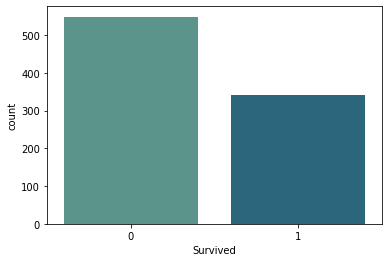

In [ ]:
#visualise survivors (1=survived, 0=not survived)
sns.countplot(train['Survived'], palette='crest')

### **Data Preprocessing**


Check for Null Values in Data :

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

 Ticket, Cabin & Name does not affect survival rate of passengers, so we will drop 'Ticket', 'Cabin' & 'Name' columns from Training and Testing Data.
 Also we will drop 'PassengerId' from taining data

In [ ]:
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)
combine = [train, test]

In [ ]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
combine = [train, test]
train.shape, test.shape

((891, 8), (418, 8))

**- Dealing with Null Values**

In [ ]:
# replacing the missing values in "Embarked" column with mode value

train['Embarked'].fillna(value = train['Embarked'].mode()[0], inplace = True)
test['Embarked'].fillna(value = test['Embarked'].mode()[0], inplace = True)

In [ ]:
# replacing the missing values in "Age" column with mean value

train['Age'].fillna(value= train['Age'].mean(), inplace= True)
test['Age'].fillna(value= test['Age'].mean(), inplace= True)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# replacing null values in "Fare" column

test['Fare'].fillna(value = test['Fare'].mean(), inplace = True)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


**- Now we will deal with Categorical Variables :**

**1. Sex vs Survival**


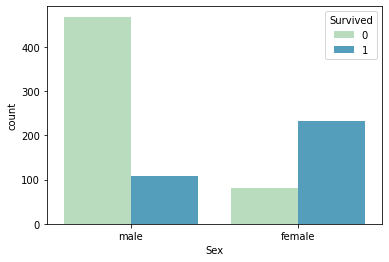

In [ ]:
# Here in our plot_ 0 = Not Survived & 1 = Survived 
sns.countplot(x='Sex',data=train,hue='Survived',palette='GnBu')

- It is Observed that Survival Rate of Females is more as compared to Males

**-  Convert 'sex' feature into numeric:**

In [ ]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


**2. Embarked vs Survival**

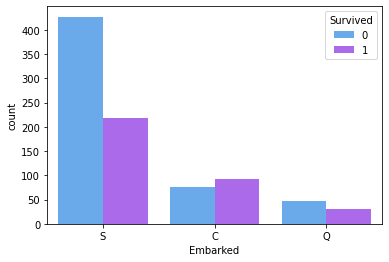

In [ ]:
sns.countplot(x='Embarked',data=train,hue='Survived',palette='cool')

- Survival rate is observed to be S > C > Q

**- Convert 'Embarked' feature into numeric**

In [ ]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


* Creating new categories using columns:


> **- To convert float values into integer values**





In [ ]:
# For columns 'Sibsp'(number of Siblings/spouses), 'Parch' (number of parents/child)

for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


**3. FamilySize(Parch , SibSp) vs Survival**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


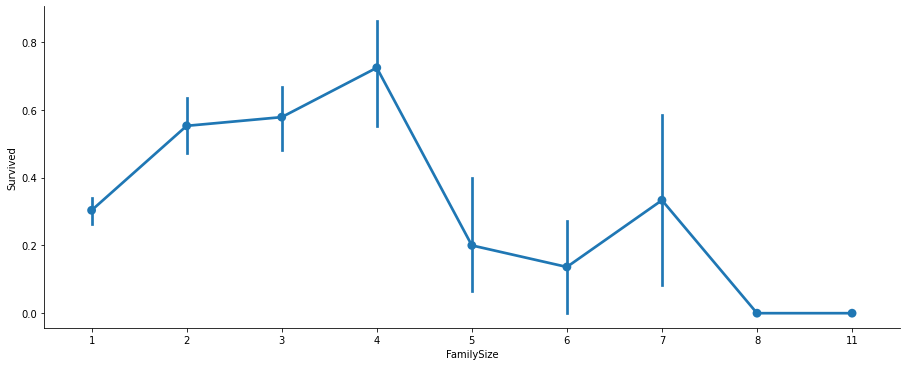

In [ ]:
# VISUALISATION
axes = sns.factorplot('FamilySize', 'Survived', data = train, aspect = 2.5 )

- Here we can see that you had a high probabilty of survival with 1 to 3 realitves, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives).

In [ ]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [ ]:
train = train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train, test]

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,22.0,7.2500,0,0
1,1,1,1,38.0,71.2833,1,0
2,1,3,1,26.0,7.9250,0,1
3,1,1,1,35.0,53.1000,0,0
4,0,3,0,35.0,8.0500,0,1


In [ ]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,892,3,0,34.5,7.8292,2,1
1,893,3,1,47.0,7.0000,0,0
2,894,2,0,62.0,9.6875,2,1
3,895,3,0,27.0,8.6625,0,1
4,896,3,1,22.0,12.2875,0,0


**4. Fare vs Survival**

In [ ]:
# For 'Fare' Column

train['FareBand'] = pd.qcut(train['Fare'], 3 , duplicates= 'drop')
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 8.662]",0.198052
1,"(8.662, 26.0]",0.402778
2,"(26.0, 512.329]",0.559322


In [ ]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 2.0, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 2.0) & (dataset['Fare'] <= 3.0), 'Fare'] = 1
    dataset.loc[ dataset['Fare'] > 3.0, 'Fare'] = 2
    dataset['Fare'] = dataset['Fare'].astype(int)

train = train.drop(['FareBand'], axis=1)
combine = [train, test]
    
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,22.0,2,0,0
1,1,1,1,38.0,2,1,0
2,1,3,1,26.0,2,0,1
3,1,1,1,35.0,2,0,0
4,0,3,0,35.0,2,0,1


**5. Age vs Survival**

In [ ]:
# To deal with 'Age' column

train['AgeBand'] = pd.cut(train['Age'], 5 , duplicates='drop')
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


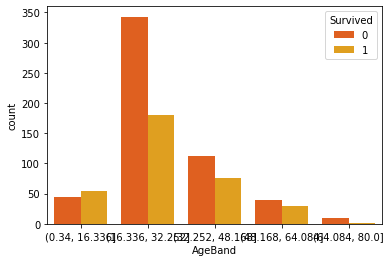

In [ ]:
sns.countplot(x='AgeBand',data=train,hue='Survived',palette='autumn')

In [ ]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
    dataset['Age'] = dataset['Age'].astype(int)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,AgeBand
0,0,3,0,1,2,0,0,"(16.336, 32.252]"
1,1,1,1,2,2,1,0,"(32.252, 48.168]"
2,1,3,1,1,2,0,1,"(16.336, 32.252]"
3,1,1,1,2,2,0,0,"(32.252, 48.168]"
4,0,3,0,2,2,0,1,"(32.252, 48.168]"


In [ ]:
train = train.drop(['AgeBand'], axis=1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,1,2,0,0
1,1,1,1,2,2,1,0
2,1,3,1,1,2,0,1
3,1,1,1,2,2,0,0
4,0,3,0,2,2,0,1


In [ ]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,892,3,0,2,2,2,1
1,893,3,1,2,2,0,0
2,894,2,0,3,2,2,1
3,895,3,0,1,2,0,1
4,896,3,1,1,2,0,0


**6. Class vs Survival**


In [ ]:
#look at survival rate by class
train.groupby('Pclass')[['Survived']].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


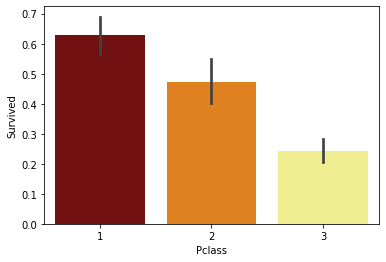

In [ ]:
#plot the survivval of each class
sns.barplot(x='Pclass', y='Survived' , data=train, palette='afmhot')

- Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1. 

In [ ]:
#look at survival rate by sex and class
train.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
0,0.368852,0.157407,0.135447
1,0.968085,0.921053,0.500000


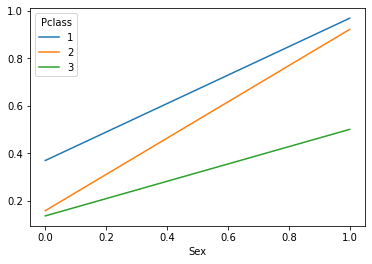

In [ ]:
#look at survival rate by sex and class visualy
train.pivot_table('Survived', index='Sex', columns='Pclass').plot()

## **Splitting the Data**

In [ ]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

## **Applying Different Algorithms to find Accuracy of the model**

In [ ]:
accuracies = []

## 1. Logistic Regression

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
accuracies.append(acc_log)
acc_log

78.11

## 2. Sopport Vector Machine (SVM)

In [ ]:
#SVM
# Support Vector Machines
from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
accuracies.append(acc_svc)
acc_svc

78.68

## 3. Ensemble Learning Techniques

### Bagging: Random Forest

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
accuracies.append(acc_random_forest)
acc_random_forest

83.16

### Boosting: XGBoost

In [ ]:
 #Train the model
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(X_train,Y_train)
#Calculate the accuracy
Y_pred=model.predict(X_test)
acc_xgb = round(model.score(X_train, Y_train) * 100, 2)
accuracies.append(acc_xgb)
acc_xgb

82.72

### **Comparing Models**

In [ ]:
models = pd.DataFrame({'Model': ['Logiatic Regression', 'SVM', 'Random Forest', 'XGBoost' ], 
                       'Score': [acc_log, acc_svc, acc_random_forest, acc_xgb ]})
models = models.sort_values(by='Score', ascending = False)
models


,Model,Score
2,Random Forest,83.16
3,XGBoost,82.72
1,SVM,78.68
0,Logiatic Regression,78.11


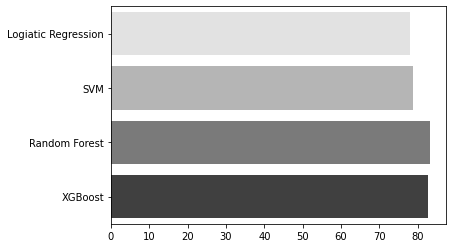

In [ ]:
labels=['Logiatic Regression', 'SVM', 'Random Forest', 'XGBoost']
fig=sns.barplot(x=accuracies, y=labels, palette='Greys')

###**'Random Forest' Algorithm Gives the best Accuracy.**